# <p style="text-align:center;">Exploring Pessoa’s Heteronymous Biographies Through a Computational Approach</p>

<img src="Images\\jeronimo-martins-sketch-fernando-pessoa.jpg" width="750" style="margin:auto"/>

Drawing by Júlio Pomar, a Portuguese Modernist painter, sitting Fernando Pessoa and some of his heteronyms at the same table

# 1. Introduction 

## 1.1 Corpus Collection and Research Question

Fernando Pessoa (1888 – 1935) was a Portuguese poet, philosopher and writer. Many of his works were written from the perspective of one of his heteronyms, these are his literary alter egos, each of which was bestowed with their biographies, detailing information from the place they grew up to their religious and political views. It is believed that Pessoa had as many as seventy-two of these heteronyms under which he published his work. For this repository, we will dive deep into the background of each of his most prolific heteronyms, Alberto Caeiro, Ricardo Reis and Alvaro De Campos, to see how their manufactured biographies are expressed through various textual features in their poems. We will explore these texts using sentiment analysis, word-frequency analysis and Type-token ratio analysis (TTR). Sentiment analysis measures how positive, negative or neutral a text is and gives a result between -1 (most negative) and 1 (most positive), with 0 being the neutral mark. In contrast, word frequency can give us the most common words in the text, which can help us to understand recurring themes or ideologies that may be present. Type-token ratio enables us to calculate the variation of language within the text, by dividing the number of types (unique tokens) by the total number of tokens we can get an understanding of its complexity. Each of these methods will be described in more detail in the tutorial section of this Notebook.

For this repository we scraped and compiled a selection of works of all three of these heteronyms as well as some of the work published by Pessoa himself. We will be working with a book of selected poems edited and translated by Richard Zenith called ‘A Little Larger Than the Entire Universe’ (2006). Richard Zenith is one of the authoritative contributors to the translation of Pessoa’s works into English. This selection has been carefully curated by him to reflect the peculiarity of each heteronyms’ poetic voice. Since the publication of this book, the complete works of Alberto Caeiro (2020) and Alvaro de Campos (2023) have been released. While the digital editions of these books exist, they cost money and were beyond our reach in preparation for this project. Nonetheless, we believe that the corpus collected here is significant and stands for an interesting examination using the methods mentioned above. Thus, our present research poses the following question: How efficient are sentiment, type-token ratio and word-frequency analyses in elucidating the stylistic peculiarities of Pessoa and his heteronyms' poems?

## 1.2 Biographical backgrounds

The following biographical accounts were collected from the Zenith selection, which includes a biography of Pessoa, as well as various letters and notes Pessoa himself wrote about each heteronym. Pessoa was so thorough with the biographical accounts of his heteronyms and his own that he designed birth charts for all of them. The official documents of these birth charts have been extracted from https://www.artsoulgroup.com/en/blog/the-work-and-the-heteronyms/

Fernando Pessoa:
Born on June 13th, 1888, in Lisbon at 3.20 pm, he grew up in Lisbon, until his father died of tuberculosis when he was five, and his little brother soon after too. After these deaths his mother moved to be with her second husband, bringing a young Pessoa to Durban in South Africa, where he stayed until he was seventeen. Pessoa was taught how to read and write from a young age, partly due to how well-educated his mother was, which ignited his love for literature. While living in Durban, he was educated in an English school where he stood out for his literary talents. Eventually, his family moved back to Lisbon, where he studied at the college for two years before dropping out. He made a career out of translating commercial business correspondence and other literary works from English to Portuguese and vice versa. Pessoa was fiercely loyal to his country of birth and believed that the rise of Portugal’s literary dominance was soon coming. Throughout his life, he published works in English, French and Portuguese, and eventually passed away after growing sick in Lisbon on November 30th, 1935.



<img src="Images\\Fernando-Pessoa-Lisboa-Pessoa-Hotel-4.jpg" width="500" style="margin:auto"/>



Alberto Caeiro:
Born on April 16th, 1889, at 1.45 pm, the heteronym Alberto Caeiro was seen as the master of Pessoa and his other heteronyms Reis and De Campos. This was impressive considering that in his manufactured biography he only had a primary school level education. Caeiro lived in the countryside, his mother and father died young, so he lived with an elderly great-aunt. As a poet of nature, Caeiro wanted to see the world as it was. His idealistic perspective on nature played heavily on his poetry. This heteronym died in 1915 aged 26, from tuberculosis. However, works under his name continued to be published until 1930.



<img src="Images\\Alberto-Caeiro-Lisboa-Pessoa-Hotel-1.jpg" width="500" style="margin:auto"/>



Ricardo Reis:
Born in Oporto on September 19th, 1887, at 4.05 pm, Ricardo Reis was a doctor who lived in Brazil from 1919. Initially a royalist sympathiser living in Oporto, he would flee to Brazil after the monarchist forces were ousted. He was educated in a Jesuit high school and was a trained Latinist and a semi-self-taught Hellenist. Pessoa defined him as ‘Horace writing in Portuguese’. He published 28 poems, all of which were ‘Horatian-style’ odes.



<img src="Images\\Ricardo-Reis-Lisboa-Pessoa-Hotel-2.jpg" width="500" style="margin:auto"/>



Alvaro De Campos:
Born on October 15th,1890 in Tavira in the Algarve at 1.30 pm, was very highly educated. He was a Naval engineer who had studied in Glasgow. Notably after his education he travelled to the Orient and wrote the poem ‘Opiary' before he eventually settled in England but did come and visit Lisbon on multiple occasions. De Campos was a bisexual who considered himself a futurist. Especially in his earlier works, he had shown a lot of excitement about machines and the modern age, although over time his work did shift into more melancholic tones.



<img src="Images\\Alvaro-de-Campos-Lisboa-Pessoa-Hotel-2.jpg" width="500" style="margin:auto"/>



With these biographies in mind, we can proceed with designing our experiment and carrying the analysis. 


# 2. Tutorial

## 2.1 Importing Modules

The following modules were used for the corpus collection and analysis. Please consult the comments within the code to see what each module was used for.

In [ ]:
#Importing modules
import re
from pypdf import PdfReader
import pandas as pd
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Download the NLTK punkt_tab model that will be used for the sentence tokenization
nltk.download('punkt_tab')
# Ensure you have the NLTK stopwords set downloaded
nltk.download('stopwords')
# Loading NLTK stopwords
stop_words = set(stopwords.words('english'))
# Download the VADER lexicon which will be used for sentiment analysis
nltk.download('vader_lexicon')
# Initialize VADER Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

## 2.2 Scraping and Corpus Collection Functions
Several functions were created which were applied to page ranges from the PDF which corresponded to the respective heteronyms' poems.

### 2.2.1 Importing the poems
The function "ImportPDF" imports specifed pages from the PDF, where each page is a list entry. the variable "heteronym" will define the name of the list, in which the pages are stored. "heteronym_pages" denotes which pages of the book are scraped. Upon completion, this function returns the list of pages.

In [2]:
# Importing and formatting the pages corresponding to the heteronym.
def ImportPDF(heteronym, heteronym_pages):

    # Importing the PDF.
    reader = PdfReader("Pessoa.pdf")
    
    heteronym = []
    # Formatting the PDF.
    for page in heteronym_pages:
        page = reader.pages[page]
        text = page.extract_text(extraction_mode="layout")
        heteronym.append(text)

    return heteronym

### 2.2.2 Determining the indeces/page numbers of poems which are split across two or more pages.
Based on the scraping parameters from the previous function, pages which contain part of a poem which was started on another page always begin with two line breaks followed by either a whitespace or text. The function "FindIndeces" uses regular expressions to find pages which start with this pattern. It then stores the indeces of these pages in a list, which is then returned.

In [3]:
# Finding the indeces of each poem which was split across two or more pages.
def FindIndeces(heteronym):
    indeces = []
    marker1 = re.compile(r"^[\n\n]")
    marker2 = re.compile(r"^[A-Z]")
    for index, page in enumerate(heteronym):
        if marker1.match(page):
            if page[2] == " " or marker2.match(page[2]):
                indeces.append(index)

    return indeces

### 2.2.3 Removing Footnotes
Some pages contain footnotes. This function removes them by filtering for, and substituting the "*" character with nothing, using regular expressions.

In [4]:
# Define a function to remove footnotes and trailing unwanted text
def remove_footnotes(text):
    # Match only footnotes that are separate from the main content
    footnote_pattern = r'^\*.*$'  # Matches lines starting with '*' on a new line
    # Remove footnotes
    text = re.sub(footnote_pattern, '', text, flags=re.MULTILINE).strip()
    return text

### 2.2.4 Joining Pages
This function uses the previously collected list of indeces of pages which include parts of split poems. It does so by applying a series of if-conditions which determine whether a page contains a self-contained poem, the first page of a poem, the last page of a poem, or an in-between page of a poem.

The first if-condition applies specifically to two-page poems. It identifies them by checking whether the page before the one being iterated, and the page immediately after is in the indeces list. If this is the case, it joins the page with one page before.

The second if-condition applies to the first and second page of poems which are longer than two pages. These pages are identified if one page before the iterated page is not in the list, but the subsequent page is in the list.

The third if-condition applies to all pages of multi-page poems except for the first, second and last. If both the previous page, and the subsequent page are in the indeces list, this page is flagged.

Finally, the fouth if-condition applies to the final page of multi-page poems. It applies if the previous page is in the indeces list, but the subsequent page is not in the indeces list.

For each of these conditions, the relevant pages are added to the "pages_to_join" list, which, upon all pages being gathered (and any footnotes removed), is joined, added to the "heteronym_joined" list, and emptied again for the next poem.

The second for-loop in this function adds poems to the "heteronym_joined" list which only span a single page, so that, in the end, all poems are joined and together in a single list, which is returned upon execution of the function.

In [5]:
# Joining poems which were split across multiple pages into one.
def JoinPages(heteronym):
    heteronym_joined = []
    pages_to_join = []
    for index in indeces:
        # Handling multi-page poems
        if index - 1 not in indeces and index + 1 not in indeces:
            # Single split
            pages_to_join.append(heteronym[index - 1]) # First page
            pages_to_join.append(heteronym[index]) # Second page
            poem = "".join(pages_to_join)
            poem = remove_footnotes(poem)  # Apply footnote removal
            heteronym_joined.append(poem)
            pages_to_join = []
        elif index - 1 not in indeces and index + 1 in indeces:
            # First page of a multi-page poem
            pages_to_join.append(heteronym[index - 1]) # First page
            pages_to_join.append(heteronym[index]) # Second page
        elif index - 1 in indeces and index + 1 in indeces:
            pages_to_join.append(heteronym[index]) # Middle pages
        elif index - 1 in indeces and index + 1 not in indeces:
            pages_to_join.append(heteronym[index]) # Last page
            poem = "".join(pages_to_join)
            poem = remove_footnotes(poem)  # Apply footnote removal
            heteronym_joined.append(poem)
            pages_to_join = []

    for poem in heteronym:
        # Handling single-page poems
        if heteronym.index(poem) not in indeces and heteronym.index(poem) + 1 not in indeces:
            poem = remove_footnotes(poem)  # Apply footnote removal
            heteronym_joined.append(poem)
    
    return heteronym_joined

## 2.3 Processing and Analysis Functions

Following, these functions were designed for the cleaning and tokenizing tasks as well as for some visualization task performed later on.

### 2.3.1 Cleaning and tokenizing the poems
This function cleans, tokenizes and reformats the joined poems. For each poem, regular expressions are used to remove excess line-breaks, whitespaces and dates. Next, the poem is tokenized. It is then processed in three ways: Firstly, it is tokenized with stopwords removed (and later saved in the "heteronym_tokenized" list). Secondly, the tokens are rejoined with punctuation kept in the poem, and only line breaks removed (this is saved in the "heteronym_formatted" list). Thirdly, the "heteronym_cleaned" list contains the poems with all linebreaks and punctuation removed. The final step is that all tokens are added to an "all_tokens" list, if they are not already in there.

The function returns a tuple of "heteronym_cleaned", "heteronym_tokenized", "all_tokens" and "heteronym_formatted". When calling the function, the variable being returned can be selected with the index of the list in square brackets after the function.

In [6]:
# Cleaning and tokenizing the poems
def CleanedTokenized(heteronym_joined):
    heteronym_formatted =[]
    heteronym_cleaned = []
    heteronym_tokenized = []
    all_tokens = []  # A list to hold all tokens for total count
    
    for poem in heteronym_joined:
        poem = re.sub(r'\n', ' ', poem)  # Remove newlines
        poem = re.sub(r'\s+', ' ', poem)  # Collapse multiple spaces
        # The following two lines of code will remove the months formatted with a first capitalized letter
        poem = re.sub(r'\b(January|February|March|April|May|June|July|August|September|October|November|December)\b', '', poem)  # Remove all the months
        poem = re.sub(r'\d+', '', poem)  # Remove all the digits
        heteronym_formatted.append(poem)

        
        # Tokenization and stopwords removal
        tokens = re.findall(r'\w+', poem)  # Tokenize without punctuation
        formatted_poem = " ".join(tokens)  # Saves the poem with new lines and excess whitespace removed.
        for index, char in enumerate(formatted_poem):  # Removes extra spaces before or after punctuation.
            if char in ".,-?:')!;":
                formatted_poem = re.sub(r"\s+([.,-?:\''’)!;])", r'\1', formatted_poem)
            if char in r"(’":
                formatted_poem = re.sub(r"([(’])\s+", r'\1', formatted_poem)
        heteronym_cleaned.append(formatted_poem) # Saves the poem in a list
        
        filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words]  # Remove stopwords
        heteronym_tokenized.append(filtered_tokens) # We want to leave only the tokenized content words in our heteronym_tokenized variable
        
        all_tokens.extend(filtered_tokens)  # Add filtered tokens to the all_tokens list

    return heteronym_cleaned, heteronym_tokenized, all_tokens, heteronym_formatted

### 2.3.2 Sentence-level sentiment analysis

A sentiment analysis calculates the sentiment of a text by measuring the frequency of specific words that may be deemed as particularly positive, negative or neutral. We wanted to measure this metric in order to see if we can correlate any of the results to the biographies of each heteronym, and particularily to the styles and themes that they explored in their poems.

We used NLTK's 'Sentiment Intensity Analyser' package, although we have experimented with other packages also, such as the VADER Sentiment Analysis. The VADER package was not yielding any meaningful results, perhaps because it was designed to work with social media texts, so we decided to move to the NLTK package. While the NLTK sentiment intensity analyser provided us with more interesting results, particularily when working on sentence-level tokenized text, we believe that our sentiment analysis could be complemented by other methodologies for more precise results. Nonetheless, after comparing the sentiment scores for different poems with a close reading of them (which you can also engage in within our active learning phase later in the Notebook) we decided that it did a decent job and its worth including in the current experiment. It is worth noting that since we are working with poems, which notoriously use metaphors and wordplay for the creation of poetic imagery, the task of assessing their sentiment becomes increasingly difficult. 

The following function calculates the sentiment score of each poem per sentence, by splitting the formatted poem list into sentences, and aggrgating each sentence's sentiment score. 

In [7]:
# Sentence-level sentiment analysis function
def sentiment_analysis_heteronym(heteronym_formatted):
    combined_text = " ".join(heteronym_formatted)
    sentences = nltk.sent_tokenize(combined_text)
    sentiment_scores = [sia.polarity_scores(sentence)['compound'] for sentence in sentences]
    avg_sentiment = sum(sentiment_scores) / len(sentiment_scores) if sentiment_scores else 0
    return avg_sentiment

### 2.3.3 Type-token Ratio
The next feature that we wanted to test in our corpuses was the Type-token ratio (TTR). Type-token ratio roughly translates to the complexity of language used. It is calculated by dividing the number of unique words in a text by the total number of words in the text. Our attempt here was to elucidate if a TTR calculation could reflect some aspects of our heteronyms' biographies and of Pessoa himself. Perhaps, we thought, we could observe Caeiro's alleged illiterateness manifested in a simpler word usage, while Campos' cosmopolitan and educated background would be revealed through a higher TTR compared to the other heteronyms. Here, we also need to point out a limitation: TTR is highly sensitive to text lengths. Our corpuses varied in length, in some cases by a couple of thousands of words. This could have affected the results of someone like Campos' for example, but we will get to this later. 

We do have to note that we have designed one variable in the previous text-cleaning function, named heteronym_tokenized, which stores only the content words for each heteronym and leaves out all the function words and punctuation in order to make the TTR calculation slightly more accurate. We did notice though that some function words slipped into this variable but due to the size of our corpus and the limited time for this project we have decided to leave them in and focus one other tasks. From what we checked though, there are not so many intruders so the results should be as sound as we could get them.

In the function below, each poem is tokenized by word, all tokens are lowered, and the TTR is calculated through the use of arythmatic operations. 

In [8]:
# Calculate Type_token Ratio for assesing language complexity
def TypeTokenRatio(heteronym_formatted):
    # Combine all poems into a single text
    combined_text = " ".join(heteronym_formatted)
    
    # Tokenize the combined text into words
    tokens = nltk.word_tokenize(combined_text.lower())  # Convert to lowercase for consistency
    
    # Calculate unique words (types) and total words (tokens)
    unique_words = set(tokens)
    total_words = len(tokens)
    
    # Compute TTR
    ttr = len(unique_words) / total_words if total_words > 0 else 0
    
    return ttr

### 2.3.4 Calculation of word frequencies
With the following function, the frequencies of each token in the tokenized poems are calculated. Remember that in our case the heteronym_tokenized variable holds only the content words in each corpus. 

In [9]:
# Calculate word frequencies
def get_word_frequencies(heteronym_tokenized):
    # Flatten the list of tokenized words and get the frequency of each word
    word_list = [word for poem in heteronym_tokenized for word in poem]
    word_frequencies = Counter(word_list)
    return word_frequencies

### 2.3.5 Extracting the most common words

With this function we can extract and also enlarge or shorten the displayed list of most frequent words as desired by specifying any number after the word_freq variable, as for example n = 50 for the 50 most common words.

In [10]:
# Find the most common words in each heteronyms' corpus
def most_common_words(word_freq, n):  
    return word_freq.most_common(n)

### 2.3.6 Creating a dataframe for each list of poems
This function first creates a dictionary in which each poem is assigned a number in the key, and the value is the cleaned poem. Subsequently, a dataframe is created containing the dictionary. Next, the "heteronym_formatted" and "heteronym_tokenized" lists are added, as well as another column containing the name of the heteronym.

The function returns a tuple of the dataframe, and heteronym_dict. When calling the function, the variable being returned can be selected with the index of the list in square brackets after the function.

In [11]:
# Create a DataFrame that will store the poems for each heteronym and Pessoa himself
def GetDF(heteronym, heteronym_cleaned, heteronym_formatted, heteronym_tokenized):
    heteronym_dict = {}
    n = 1
    for poem in heteronym_cleaned:
        heteronym_dict["poem_"+str(n)] = poem
        n += 1
    
    # Adding Caeiro's poems into a Df.
    df = pd.DataFrame(list(heteronym_dict.items()), columns=["Index", "Cleaned_text"])
    df["Formatted_text"] = heteronym_formatted
    df["Tokenized_text_Content"] = heteronym_tokenized
    df["Heteronym"] = heteronym
    
    return df, heteronym_dict

### 2.3.7 Exporting the poems to .txt
This function creates a folder in the working directory for each heteronym (if this doesn't already exist), and saves each formatted poem as a .txt file in that folder.

In [12]:
# Exporting the corpus to .txt files.
def ExportToTxt(heteronym, heteronym_dict):  # This relies on the previous function outputting the heteronym's dictionary.
    if heteronym not in os.listdir():
        os.mkdir(heteronym)  # Creates a folder for the heteronym if it doesn't already exist.
    for key in heteronym_dict:
        if key + ".txt" not in os.listdir(heteronym + "/"):  # Creates the file if it doesn't already exist.
            file = open(heteronym + "/" + key + ".txt", "x")
            file.close()
        with open(heteronym + "/" + key + ".txt", "w", encoding="utf-8") as file:  # Writes into the file.
            file.write(heteronym_dict[key])
    
    return "Complete"

### 2.3.8 Creating a plot for the most common words
This function uses matplotlib to visualize the 20 most common words of each heteronym as a bar plot. This visualization can help better spot which words overlap between heteronyms and which ones are more specific to one heteronym or Pessoa himself.

In [13]:
# Plot the most common words for each poet
def plot_most_common_words(all_poets_word_freq, n=20):
    plt.figure(figsize=(12, 8))
    for poet, word_freq in all_poets_word_freq.items():
        common_words = most_common_words(word_freq, n)
        words, counts = zip(*common_words)
        plt.bar(words, counts, label=poet)

    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Most Common Words for Each Poet')
    plt.xticks(rotation=45, ha = 'right')
    plt.legend()
    plt.show()

## 2.4 Pessoa and His Heteronyms - Analysis

### 2.4.1 Alberto Caeiro

In [14]:
# Importing the PDF:
caeiro = ImportPDF("caeiro", range(56,126))

# Stripping the top of the pages and other unnecessary details.
for page in caeiro:
    if "a little larger than the entire universe" in page:
        caeiro[caeiro.index(page)] = page[2:].lstrip("a little larger than the entire universe")
    if "alberto caeiro" in page:
        caeiro[caeiro.index(page)] = page.strip("alberto caeiro")[2:]
    if "alber t o caeiro" in page:
        caeiro[caeiro.index(page)] = page.strip("alber t o caeiro")[2:]
    if len(page) == 0:
        caeiro.remove(page)
    if "            from\nTHE SHEPHERD IN LOVE" in page or "           from\nUNCOLLECTED POEMS" in page:
        caeiro.remove(page)

# Finding the indices of each poem split across two or more pages.
indeces = FindIndeces(caeiro)

# Joining poems which are split across multiple pages.
caeiro_joined = JoinPages(caeiro)

# Removing empty list entries.
caeiro_joined = [poem for poem in caeiro_joined if len(poem.strip()) > 0]

# Cleaning and tokenizing the poems.
caeiro_cleaned = CleanedTokenized(caeiro_joined)[0]
caeiro_tokenized = CleanedTokenized(caeiro_joined)[1]
caeiro_formatted = CleanedTokenized(caeiro_joined)[3]

# Count the total number of content words.
caeiro_all_tokens = CleanedTokenized(caeiro_joined)[2]

First, we will keep track of each heteronyms' corpus size, since it will be relevant for parts of our analysis. As mentioned before, we will be observing mostly the content words, since they are more relevant for most parts of our analysis. For the sentiment analysis, the function uses a different variable, which stores the entire texts of the poems, with the punctuation and function words included.

In [15]:
print(f"Caeiro's corpus comprises", len(caeiro_all_tokens), "content words.")

Caeiro's corpus comprises 3522 content words.


In [16]:
# Calculate the average sentiment score in Caeiro's poems 
caeiro_sentiment = sentiment_analysis_heteronym(caeiro_formatted)
print(f"Caeiro's average sentiment: {caeiro_sentiment:.3f}")

Caeiro's average sentiment: 0.061


We have found Caeiro to write in a broadly neutral to positive style with a score of 0.061. From our understanding of Caeiro, this general sentiment found in his works seems to align with his character. Zenith (2014, pg. xx) claims that Caeiro had an idealistic view of nature, one of the main themes he wrote about in his poetry. His positive tone often emerges from his reverence for nature. One such example of this is in his poem ‘IX’: ‘and I lie down in the grass, and close my warm eyes…, I know the truth, and I’m happy’ (pg. 23). Caeiro marvels at the simplicity and beauty of nature but also uses it to confront his existentialist doubts. In ‘XXI’ he says ‘and to remember, when death comes, that each day dies, and the sunset is beautiful, and so is the night that remains’ (pg. 28). 

This juxtaposition of life and death with nature creates a peaceful, reflective tone which along with the awareness of the reality of impermanence line up well with the crafted biography of Caeiro. As Pessoa tells us, both his parents died young, which left him to grow up with an elderly aunt in the countryside. He uses nature as a vessel to present his emotions, feelings that likely stem from Pessoa’s loss of his father and brother. Therefore, although the language sentiment in his work leans positive, themes of uneasy self-reflection can be identified in his work, probably bringing his sentiment score close to a neutral position.

In [17]:
caeiro_ttr = TypeTokenRatio(caeiro_formatted)
print(f"Caeiro's language complexity score: {caeiro_ttr:.3f}")

Caeiro's language complexity score: 0.146


Analysis of Caeiro’s lexical variety will help to offer insight into the differences, or the lack of them, between the heteronyms. We can better understand Caeiro when we compare his type-token ratio score to the lexical variety of Pessoa and his other heteronyms. This is because we are trying to understand the difference between the lexical personalities of Pessoa. 

It is worth noting that the type-token ratio can offer some insight into the lexical variety of the texts, however, it does have some limitations. Its biggest issue, as mentioned before, is that it is heavily affected by the size of a corpus - a large corpus can be seen as having low variety due to the large number of tokens, while a shorter corpus can appear as having a high variety. 

Notably, it is significant that Caeiro’s score of 0.146 is similar to Campos’ score of 0.152. Campos is a naval engineer who is college-educated, while Caeiro received very little education, only completing primary school. Upon immediate intuition this would lead one to think that Campos' lexical complexity score would be higher purely due to the two heteronyms' educational background. However, the outcome of the ttr experiment leads us to infer that the resulted complexity score of Caeiro and Campos indicates that Pessoa was not completely able to separate his writing style between each heteronym, with the main differences between the heteronyms coming through other features rather than lexical aptitude.

As we will discover in a bit though, Campos' corpus is indeed much larger than the corpus of Caeiro, which could have skewed the results. Thus, there is a possibility that the lexical variety of Campos may be significantly more unique than that of Caeiro, despite the measurement that the type-token ratio presented us.


In [18]:
# Get the 50 most common words 
caeiro_word_freq = get_word_frequencies(caeiro_tokenized)
caeiro_top_words = most_common_words(caeiro_word_freq, n=50)
print("Caeiro's top 50 words:", caeiro_top_words)

Caeiro's top 50 words: [('know', 54), ('think', 48), ('things', 47), ('like', 44), ('see', 39), ('feel', 37), ('say', 30), ('would', 28), ('world', 28), ('ﬂowers', 27), ('even', 26), ('one', 25), ('nature', 22), ('us', 21), ('want', 21), ('way', 20), ('without', 20), ('day', 19), ('right', 18), ('life', 18), ('different', 18), ('trees', 17), ('people', 17), ('god', 17), ('reality', 17), ('man', 16), ('nothing', 16), ('sometimes', 15), ('earth', 15), ('road', 15), ('something', 15), ('real', 15), ('never', 14), ('stones', 14), ('always', 14), ('everything', 13), ('exist', 13), ('exists', 13), ('universe', 13), ('seeing', 13), ('outer', 13), ('eyes', 12), ('thinking', 12), ('happy', 12), ('write', 12), ('since', 12), ('look', 11), ('love', 11), ('much', 11), ('tomorrow', 11)]


Caeiro’s most frequent words, unsurprisingly, are dominated by words related to nature, like ‘flowers’ at 27 and ‘trees’ at 17. We can expect this from his biography, as we know he grew up and had always been surrounded by nature. Something interesting, however, is the large reduction in the use of ‘life’. He uses the word 17 times, which means the word is just barely in his top twenty, while the other heteronyms and Pessoa all have it in their top three. Why does Caeiro use it so much less? One possible explanation could be that through his lens of nature, he wishes to view it more simply, not focusing on what it is, just that it is. Throughout his poems, for example, ‘VI’, he makes consistent references to being ‘simple and calm, like the trees and streams’ (pg. 15). Although contemplative, Caeiro’s thematic niche keeps his language, for the most part, grounded in a separate line of thought then Pessoa and the other heteronyms. 

On top of this, Zenith notes that Caeiro was created to ‘see things as they are, without any philosophy’. But then later notes that his poetry is ‘pure philosophy’. By measuring the most frequent words we can see exactly what Zenith means here, as the two most frequent words used by Caeiro were ‘think’ and ‘know’. Two undeniably philosophical verbs, the contradiction between Caeiro’s intentions of his work, and the result can be seen. An example of the way he uses this language is in the poem ‘II’ (pg. 11), he said ‘the world wasn’t made for us to think about it’. Although he argues for a simplistic view of the world without a deeper meaning, this in itself is a philosophical discourse.


In [19]:
# Present the corpus as a DataFrame.
caeiro_df = GetDF("Caeiro", caeiro_cleaned, caeiro_formatted, caeiro_tokenized)[0]
caeiro_df.head()

,Index,Cleaned_text,Formatted_text,Tokenized_text_Content,Heteronym
0,poem_1,II My gaze is clear like a sunﬂower It is my c...,II My gaze is clear like a sunﬂower. It is my ...,"[ii, gaze, clear, like, sunﬂower, custom, walk...",Caeiro
1,poem_2,IV This afternoon a thunderstorm Rolled down f...,IV This afternoon a thunderstorm Rolled down f...,"[iv, afternoon, thunderstorm, rolled, slopes, ...",Caeiro
2,poem_3,VIII One midday in late spring I had a dream t...,VIII One midday in late spring I had a dream t...,"[viii, one, midday, late, spring, dream, like,...",Caeiro
3,poem_4,XXVIII Today I read nearly two pages In the bo...,XXVIII Today I read nearly two pages In the bo...,"[xxviii, today, read, nearly, two, pages, book...",Caeiro
4,poem_5,XLVI In this way or that way As it may happen ...,"XLVI In this way or that way, As it may happen...","[xlvi, way, way, may, happen, happen, sometime...",Caeiro


In [20]:
# Exports the corpus to .txt files.
caeiro_dict = GetDF("Caeiro", caeiro_formatted, caeiro_cleaned, caeiro_tokenized)[1]
ExportToTxt("Caeiro", caeiro_dict)

'Complete'

### 2.4.2 Ricardo Reis

In [21]:
#Importing the PDF
reis = ImportPDF("reis", range(128,189))

# Stripping the top of the pages and other unnecessary details.
for page in reis:
    if "a little larger than the entire universe" in page:
        reis[reis.index(page)] = page[2:].lstrip(" 0123456789 a little larger than the entire universe")
    if "ricardo reis" in page[:12]:
        reis[reis.index(page)] = page.lstrip("Ricardo reis")[2:]
    if len(page) == 0:
        reis.remove(page)

# Finding the indices of each poem split across two or more pages.
indeces = FindIndeces(reis)

# Joining poems which are split across multiple pages.
reis_joined = JoinPages(reis)

# Removing empty list entries
reis_joined = [poem for poem in reis_joined if len(poem.strip()) > 0]

# Cleaning and tokenizing the poems
reis_cleaned = CleanedTokenized(reis_joined)[0]
reis_tokenized = CleanedTokenized(reis_joined)[1]
reis_formatted = CleanedTokenized(reis_joined)[3]

# Count the total number of content words
reis_all_tokens = CleanedTokenized(reis_joined)[2]
print(f"Reis' corpus comprises", len(reis_all_tokens), "content words.")

Reis' corpus comprises 2234 content words.


In [22]:
# Calculate the average sentiment score in Caeiro's poems 
reis_sentiment = sentiment_analysis_heteronym(reis_formatted)
print(f"Reis's average sentiment: {reis_sentiment:.3f}")

Reis's average sentiment: 0.112


Reis’ average sentiment is approximated at 0.112. His sentiment score is the highest among the heteronyms and Pessoa himself. This is likely because, from our understanding of Reis’ biography, he did not have as tragic a life as Caeiro. We have no mention of any loss in his family and as far as we know he was a successful doctor. The reason for Reis’ positive sentiment, as Zenith argues, may be because he is focused on ‘the vanity of life and the need to accept our fate’ (pg. XXII). He does not portray this in a negative, pessimistic way, but with the realistic take that it is necessary, and better for our enjoyment of life. An example of this perspective comes from one of Reis’ poems, ‘happy those who, placing their delight In slight things, are never deprived of each day’s natural fortune’ (pg. 136). On top of this, Pessoa states that Reis’ odes, which he wrote all of his poems in the style of, shared many thematic similarities with Horace (pg. 423). Horace was famous for writing his odes on the themes of ‘love, friendship, philosophy and the art of poetry’ (Britannica, 2025). We also know that an ode is often a ceremonious poem that celebrates, a person, place or thing (PoetryFoundation, 2025). Perhaps it is the celebratory aspect of the ode that make Reis’ works have a more sentimentally positive score.

In [23]:
reis_ttr = TypeTokenRatio(reis_formatted)
print(f"Reis' language complexity score: {reis_ttr:.3f}")

Reis' language complexity score: 0.230


Out of the heteronyms and Pessoa, Reis’ Type-token ratio score is the highest. This is likely to do with his highly educated profile and thematic interests. Specifically, Reis is a Classicist and a semi-Hellenist. He references ancient Greek values and topics throughout his poetry. These broader topics allow him to use more unique vocabulary, by diving into a lexicon derived from ancient Greek culture, which could result in his lexical variety being stronger. However, it is notable that Reis wrote the least of all the heteronyms, with a total word count of just over 2000 in this selection, which as previously mentioned can affect the lexical variety of the text, giving it an inflated score.

In [24]:
# Get the 50 most common words 
reis_word_freq = get_word_frequencies(reis_tokenized)
reis_top_words = most_common_words(reis_word_freq, n=50)
print("Reis's top 50 words:", reis_top_words)

Reis's top 50 words: [('us', 40), ('let', 34), ('life', 30), ('gods', 29), ('nothing', 24), ('one', 18), ('sun', 16), ('love', 16), ('like', 16), ('day', 13), ('calm', 12), ('lydia', 12), ('god', 11), ('without', 11), ('little', 11), ('others', 11), ('give', 11), ('know', 10), ('even', 10), ('game', 10), ('since', 10), ('night', 9), ('chess', 9), ('things', 9), ('knows', 9), ('fate', 9), ('want', 9), ('time', 8), ('hour', 8), ('moment', 8), ('enjoy', 8), ('good', 7), ('whatever', 7), ('see', 7), ('ancient', 7), ('given', 7), ('destiny', 7), ('future', 7), ('live', 6), ('forever', 6), ('children', 6), ('cold', 6), ('world', 6), ('lives', 6), ('still', 6), ('freedom', 6), ('better', 6), ('never', 6), ('man', 6), ('mind', 6)]


Reis’ classical philosophical ideas are evident through the prevalence of concepts such as ‘gods’ at 29, ‘fate’ at 9 and ‘destiny’ at 7. These are all relevant Hellenistic ideals which are easily identified with Reis’ background as a classicist, through themes of order and inevitability, ‘like the calm, implacable destiny that reigns above the gods’ (pg. 92). Reis belief on humans' accepting their fate is illustrated in the following lines: 'The only freedom the gods grant us Is this: to submit Of our own free will to their sovereignty. We should do just that, Since only in the illusion of freedom Does freedom exist.' (pg. 93).

In addition to this, Reis uses natural imagery in his poetry, with ‘sun’ at 16, ‘day’ at 13 and ‘cold’ at 6. These also correlate with his background, as Pessoa has said that the other heteronyms and Pessoa himself all view Alberto Caeiro as their master. This is further evidenced in the poem that Reis dedicates to Alberto Caeiro: 'Keeping forever Peaceful and calm, Taking children For our teachers And letting Nature Fill our eyes... Along the river Or along the road, Wherever we are, Always remaining In the same, easy Repose of living...' (pg. 84).

In [25]:
# Present the corpus as a DataFrame.
reis_df = GetDF("Reis", reis_cleaned, reis_formatted, reis_tokenized)[0]
reis_df.head()

,Index,Cleaned_text,Formatted_text,Tokenized_text_Content,Heteronym
0,poem_1,To Alberto Caeiro Peaceful Master Are all the ...,"To Alberto Caeiro Peaceful, Master, Are all th...","[alberto, caeiro, peaceful, master, hours, los...",Reis
1,poem_2,Each thing in its time has its time The trees ...,"Each thing, in its time, has its time. The tre...","[thing, time, time, trees, blossom, winter, wh...",Reis
2,poem_3,THE CHESS PLAYERS I ve heard that once during ...,"THE CHESS PLAYERS I’ve heard that once, during...","[chess, players, heard, know, war, persia, inv...",Reis
3,poem_4,I love the roses of Adonis s gardens Yes Lydia...,"I love the roses of Adonis’s gardens. Yes, Lyd...","[love, roses, adonis, gardens, yes, lydia, lov...",Reis
4,poem_5,The god Pan isn t dead In each ﬁeld that shows...,The god Pan isn’t dead. In each ﬁeld that show...,"[god, pan, dead, ﬁeld, shows, ceres, naked, br...",Reis


In [26]:
# Exports the corpus to .txt files.
reis_dict = GetDF("Reis", reis_formatted, reis_cleaned, reis_tokenized)[1]
ExportToTxt("Reis", reis_dict)

'Complete'

### 2.4.3 Álvaro de Campos

In [27]:
# Importing the PDF.
campos = ImportPDF("campos", range(192,318))

# stripping the top of the pages, and dates at the end.
# Due to how the PDF was imported, I had to apply several different parameters here.
for page in campos:
    if "a little larger than the entire universe" in page:
        campos[campos.index(page)] = page.lstrip(" 0123456789 a little larger than the entire universe")
    if "álvaro de campos" in page[:16]:
        campos[campos.index(page)] = page.lstrip("álvaro de campos")[3:]
    if "álva r o de campos" in page[:18]:
        campos[campos.index(page)] = page.lstrip("álvaro de campos")[3:]
    if len(page) == 0:
        campos.remove(page)

# Finding the indices of each poem split across two or more pages.
indeces = FindIndeces(campos)

# Joining poems which are split across multiple pages.
campos_joined = JoinPages(campos)

# Joining the poems results in a few more empty list entries, which are removed here.
campos_joined = [poem for poem in campos_joined if len(poem.strip()) > 0]


# Cleaning and tokenizing the poems
campos_cleaned = []
campos_tokenized = []

# Cleaning and tokenizing the poems
campos_cleaned = CleanedTokenized(campos_joined)[0]
campos_tokenized = CleanedTokenized(campos_joined)[1]
campos_formatted = CleanedTokenized(campos_joined)[3]

# Count the total number of content words.
campos_all_tokens = CleanedTokenized(campos_joined)[2]
print(f"Campos' corpus comprises", len(campos_all_tokens), "content words.")

Campos' corpus comprises 12223 content words.


In [28]:
# Calculate the average sentiment score in Caeiro's poems 
campos_sentiment = sentiment_analysis_heteronym(campos_formatted)
print(f"Campos's average sentiment: {campos_sentiment:.3f}")

Campos's average sentiment: 0.012


Campos’ sentiment score of 0.012 is the lowest of all the heteronyms' works we have covered and the closest to neutral. Campos' early days were marked by an excitement for modernism and technology, in the fashion of the futurists: 'If I could express my whole being like an engine! If I could be complete like a machine! If I could go triumphantly through life like the latest model car!' (pg. 154). In his later period he is becoming increasingly existential and pessimistic: 'On this sad day my heart sadder than the day... Moral and civic obligations? The intricate web of duties, of consequences? No, nothing... A sad day, an apathy toward everything... Nothing...' (pg. 228). 

Zenith refers to this and believes that Campos had a natural progression throughout his career, with his later poems becoming more melancholic and shorter (Zenith, 2014, pg. XXI). Another example of Campos’ more pessimistic works comes from ‘LÀ-BAS, JE NE SAIS OÙ’, where he refers to himself in the third person as ‘so isolated in life! So depressed! Poor guy’ (pg. 267). It seems that as he got further into his career, the heteronym Campos possibly became disillusioned with the ideals of his youth. On top of this, the fact he refers to himself in the third person mirrors the perspective of Pessoa as he writes for Campos, which may be a representation of Pessoa’s detached self-perception. 

Considering this two-fold perspective of Campos' biography, we can assess our sentiment score for this heteronym as being rather accurate. 

In [29]:
campos_ttr = TypeTokenRatio(campos_formatted)
print(f"Campos' language complexity score: {campos_ttr:.3f}")

Campos' language complexity score: 0.152


Campos’ lexical variety is, as previously mentioned, very similar to Caeiro. Despite the obvious difference in education level, they were both able to write at similar levels of lexical variety. The ratio findings show us that Campos does not use very complex vocabulary when compared to the others. However, due to the large amount of tokens, the type-token ratio may not represent truthfully the complexity of his vocabulary. Based on his corpus size and number of poems though, displayed in the DataFrame below, we deduce that he would likely have had a more verbose style of writing and the ttr score in his case is skewed due to previously-mentioned limitation of the method itself that relates to working with larger corpora.


In [30]:
# Get the 50 most common words 
campos_word_freq = get_word_frequencies(campos_tokenized)
campos_top_words = most_common_words(campos_word_freq, n=50)
print("Campos's 50 top words:", campos_top_words)

Campos's 50 top words: [('ey', 212), ('like', 149), ('life', 136), ('hey', 78), ('everything', 75), ('ah', 67), ('soul', 65), ('know', 65), ('one', 64), ('feel', 59), ('things', 56), ('without', 48), ('want', 48), ('nothing', 47), ('even', 45), ('every', 45), ('see', 43), ('go', 43), ('people', 42), ('sea', 42), ('men', 42), ('hup', 41), ('never', 40), ('god', 40), ('world', 40), ('night', 36), ('day', 35), ('blood', 35), ('us', 35), ('ship', 34), ('great', 33), ('always', 32), ('heart', 32), ('come', 32), ('let', 31), ('ships', 31), ('something', 30), ('going', 29), ('time', 28), ('leave', 28), ('good', 27), ('else', 27), ('far', 27), ('make', 27), ('old', 26), ('still', 26), ('body', 26), ('love', 25), ('ever', 25), ('another', 25)]


Through Campos’ most frequent words, we can see evidence of the sensory imagery we expect Campos to come into contact with throughout his life. As a naval engineer, there are multiple references, like ‘sea’ at 42 and ‘ship’ at 34, to his career travelling the ocean. This shows clearly that Campos was influenced in his poetry by the crafted experiences he would have had in his ‘life’. 

Through his poetic commentary on ships, we can see his futurist ideals being presented. In ‘Triumphal Ode’, he described the ‘freight-carrying toil of ships…, slow and smooth turning of cranes…, disciplined tumult of factories’ (pg. 154). He uses very refined, deliberate language which complements his perceived view of the elegance and precision of technology. 

Another interesting aspect of Campos’ works is that, like Pessoa and the other heteronyms, he is also very introspective and emotional with his poetry. This can be seen through his use of ‘soul’ at 65 and ‘feel’ at 59, thus, despite his agreement with futurist ideals. Campos as a heteronym remains connected with the same questions of self-awareness and the impermanence of life that Pessoa was so infatuated with, both through his existence as a heteronym and as a student of Caeiro.


In [31]:
# Present the corpus as a DataFrame.
campos_df = GetDF("Campos", campos_cleaned, campos_formatted, campos_tokenized)[0]
campos_df.head()

,Index,Cleaned_text,Formatted_text,Tokenized_text_Content,Heteronym
0,poem_1,OPIARY It s before I take opium that my soul i...,OPIARY It’s before I take opium that my soul i...,"[opiary, take, opium, soul, sick, feel, life, ...",Campos
1,poem_2,TRIUMPHAL ODE By the painful light of the fact...,TRIUMPHAL ODE By the painful light of the fact...,"[triumphal, ode, painful, light, factory, huge...",Campos
2,poem_3,EXCERPTS FROM TWO ODES I Come ancient and unch...,"EXCERPTS FROM TWO ODES I Come, ancient and unc...","[excerpts, two, odes, come, ancient, unchangin...",Campos
3,poem_4,MARITIME ODE Alone this summer morning on the ...,MARITIME ODE Alone this summer morning on the ...,"[maritime, ode, alone, summer, morning, desert...",Campos
4,poem_5,SALUTATION TO WALT WHITMAN Portugal Inﬁnity el...,"SALUTATION TO WALT WHITMAN Portugal, Inﬁnity— ...","[salutation, walt, whitman, portugal, inﬁnity,...",Campos


In [32]:
# Exports the corpus to .txt files.
campos_dict = GetDF("Campos", campos_formatted, campos_cleaned, campos_tokenized)[1]
ExportToTxt("Campos", campos_dict)

'Complete'

### 2.4.4 Fernando Pessoa - Himself

In [33]:
# Importing the PDF.
pessoa = ImportPDF("pessoa", range(322,428))

# stripping the top of the pages, and dates at the end.
# Due to how the PDF was imported, I had to apply several different parameters here.
for page in pessoa:
    if "a little larger than the entire universe" in page:
        pessoa[pessoa.index(page)] = page.lstrip(" 0123456789 a little larger than the entire universe")
    if "fernando pessoa–himself" in page[:23]:
        pessoa[pessoa.index(page)] = page.lstrip("fernando pessoa–himself")[3:]
    if len(page) == 0:
        pessoa.remove(page)

# Finding the indices of each poem split across two or more pages.
indeces = FindIndeces(pessoa)

# Joining poems which are split across multiple pages.
pessoa_joined = JoinPages(pessoa)

# Joining the poems results in a few more empty list entries, which are removed here.
pessoa_joined = [poem for poem in pessoa_joined if len(poem.strip()) > 0]

# Cleaning and tokenizing the poems
pessoa_cleaned = CleanedTokenized(pessoa_joined)[0]
pessoa_tokenized = CleanedTokenized(pessoa_joined)[1]
pessoa_formatted = CleanedTokenized(pessoa_joined)[3]

# Count the total number of tokens
pessoa_all_tokens = CleanedTokenized(pessoa_joined)[2]
print(f"Pessoa's corpus comprises", len(pessoa_all_tokens), "content words.")

Pessoa's corpus comprises 4848 content words.


In [34]:
# Calculate the average sentiment score in Caeiro's poems 
pessoa_sentiment = sentiment_analysis_heteronym(pessoa_formatted)
print(f"Pessoa's average sentiment: {pessoa_sentiment:.3f}")

Pessoa's average sentiment: 0.035


Pessoa’s sentiment score is also within the same range as the three heteronyms. With a score of 0.035, Pessoa’s work is only slightly more positive than Campos’. Pessoa, as the orthonym, has a real history that is much more discernible when it comes to relating his biography and his poetry. For example, in the same way in which Caeiro’s sentiment score may have been affected by negative themes from his life, like the death of his parents, the same can be said for Pessoa, who lost his father and brother when he was only five years old. This grief would have not only shaped his work but would also have affected the heteronyms. 

The thematic topics of identity, existence and reality that Pessoa engages with, form the foundation of each of his heteronym’s writings. However, just like the other heteronyms, he views Caeiro as his master. On top of this, the same way his perspectives influence the poetry of the heteronyms, their views may affect him. For example, a shade of Reis' stoicism can be seen in the following lines: 'What matters is that nothing matter Anymore...Whether Fate Hangs over us or quietly and obscurely Lurks in the distance Is all the same...Here’s the moment... Let’s be it . . . What good is thinking?' (pg. 286). 

Caeiros's respect and love for nature, and Reis’ classicist ideals may imbue his text with a more positive sentimental tone, which is why his work is broadly of a neutral to positive sentiment. This is evident in lines like ‘A sunday, and the Sun Shining Golden with joy’ (pg. 290), where he uses the themes of his heteronyms, in the same way they use his. This, in combination with his base existentialist tone, creates a more balanced sentimental tone.


In [35]:
pessoa_ttr = TypeTokenRatio(pessoa_formatted)
print(f"Pessoa's language complexity score: {pessoa_ttr:.3f}")

Pessoa's language complexity score: 0.172


Pessoa’s type-token ratio score of 0.172, is the second highest in lexical variety amongst the heteronyms. Just as with the sentiment score, the lexical variety of his works all roughly coincide. The shared literary creator of all of these works is a key reason why the lexical variety is so similar. This would be the hardest thing for Pessoa to differentiate between his heteronyms, changing the actual writing style of himself between each of them. Although it is affected by other factors, like Reis’ distinct use of classicist concepts, and the fluctuating size of a corpus, the general proximity in variety makes it clear that although each heteronym has its unique perspective, they are all bound by the same literary author, therefore carrying the stylistic inclination of Pessoa, in all of their works.


In [36]:
# Get the 50 most common words 
pessoa_word_freq = get_word_frequencies(pessoa_tokenized)
pessoa_top_words = most_common_words(pessoa_word_freq, n=50)
print("Pessoa's 50 top words:", pessoa_top_words)

Pessoa's 50 top words: [('life', 52), ('soul', 51), ('one', 46), ('know', 40), ('nothing', 35), ('see', 32), ('like', 32), ('heart', 31), ('without', 28), ('god', 25), ('night', 22), ('feel', 22), ('even', 21), ('dream', 21), ('world', 21), ('everything', 20), ('us', 19), ('mother', 19), ('time', 18), ('never', 18), ('sad', 17), ('un', 17), ('soir', 17), ('à', 17), ('lima', 17), ('still', 16), ('day', 15), ('today', 15), ('sun', 15), ('ah', 15), ('man', 15), ('happy', 14), ('body', 14), ('trees', 13), ('people', 13), ('remember', 13), ('end', 13), ('good', 13), ('exist', 13), ('hour', 12), ('self', 12), ('calm', 12), ('hand', 12), ('make', 12), ('take', 12), ('away', 12), ('much', 12), ('hands', 11), ('eyes', 11), ('hear', 11)]


One of the consistent themes of Pessoa’s works is his reflection on his life and identity. He explores this thought through the creation of these heteronyms, people that allow him to view life from a different perspective. Thus, the common use of ‘life’ and ‘know’ and ‘see’, in each of his heteronym's most frequent words, illuminates Pessoa’s fascination with the questions of existence, things he explored through poetry. It is the binding force behind all of his work. 

Something else that is curious in his personal oeuvre, is that ‘mother’ at 19 is only amongst the most common words for Pessoa, not for any of his heteronyms. This distinction is important in showing us the value of his own orthonymic identity, this is a piece of himself that is rooted in his biography. It is something that he could only write about when he was writing poetry as himself. We know how important this relationship was to Pessoa through his poem UN SOIR À LIMA. Where one of his most powerful lines, ‘she died, but I’ll always be her little boy, because no one, for his mother, is ever a man’ (pg. 354), showcases his enduring grief and love. Zenith identifies this poem as being written around September 1935, one month before Pessoa’s death and 10 years after his mothers. This unrelenting memory of his mother would have influenced the emotional essence of Pessoa’s later work and can be attributed to Zeniths, previously mentioned, belief that Campos’ work grew more melancholic later in his career. 

-----

## 2.5 Concluding Thoughts

For further insights, a chronological analysis of the sentiment scores of Pessoa and his heteronyms may reveal the impact of these emotional events on his multiple perspectives, and how they used it to fuel their creative output. We have attempted to pair our computational findings with a close reading of Pessoa and his heteronyms' work, although our exercise is not exhaustive. Pessoa's literary universe is, in the way that the title of our selection indicates, 'a little large than the entire universe' and we hope that this inspires other people to delve further into the enigmatic work of this author. 

Similarly, our type-token ratio method could be tried with a couple of variations: how would lemmatizing the tokens before running the ttr analysis affect the results? We do believe that our method can be fine-tuned for more accurate results.

In relation to the word frequency analysis, we do not ignore our own subjectivity when interpreting the results. We do believe though that a combination of reading through the frequency scores paired with a close reading of the words in context is the best way to go about this kind of analysis and that is what we attempted to do. 

In the code that follows we have aggregated the four corpuses into one DataFrame and exported it to .csv which should make it easily accessible to others interested in continuing our analysis, perhaps with more detailed and precise methodologies. We have also exported all the processed poems for each heteronym into separate .txt files, deposited in a folder for each heteronym and Pessoa respectively. 

Lastly, we are also providing some visualizations in which we compare the 3 heteronyms and Pessoa himself on the features that we have explored in order to help understand our results better.

The two Active Learning exercises at the end should lend themselves useful for anyone interested in pairing our results with a close reading of the poems and assess the efficiency of the methods that we used, as well as allow to design a personalized experiment to further explore features of Pessoa and his heteronyms' work and relate them to their biographies.

In [37]:
# Present the corpus as a DataFrame.
pessoa_df = GetDF("Pessoa", pessoa_cleaned, pessoa_formatted, pessoa_tokenized)[0]
pessoa_df.head()

,Index,Cleaned_text,Formatted_text,Tokenized_text_Content,Heteronym
0,poem_1,Swamps of yearnings brushing against my gilded...,Swamps of yearnings brushing against my gilded...,"[swamps, yearnings, brushing, gilded, soul, di...",Pessoa
1,poem_2,from SLANTING RAIN I My dream of an inﬁnite po...,from SLANTING RAIN I My dream of an inﬁnite po...,"[slanting, rain, dream, inﬁnite, port, crosses...",Pessoa
2,poem_3,She sings poor reaper perhaps Believing hersel...,"She sings, poor reaper, perhaps Believing hers...","[sings, poor, reaper, perhaps, believing, happ...",Pessoa
3,poem_4,DIARY IN THE SHADE Do you still remember me Yo...,DIARY IN THE SHADE Do you still remember me? Y...,"[diary, shade, still, remember, knew, long, ti...",Pessoa
4,poem_5,Where s my life going and who s taking it ther...,"Where’s my life going, and who’s taking it the...","[life, going, taking, always, want, destiny, k...",Pessoa


Before moving to the Active Learning section where you can explore 

## 2.6 Comparative  Visual Analysis of Pessoa and the Three Heteronyms

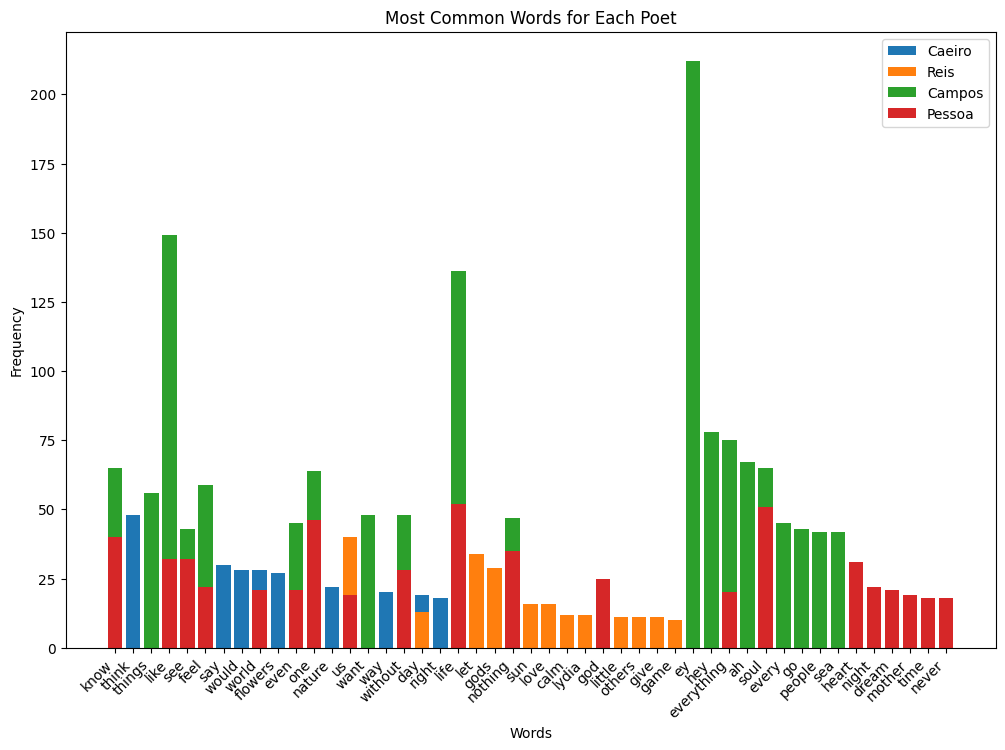

In [38]:
# Combine the word frequencies for all poets
all_poets_word_freq = {
    'Caeiro': caeiro_word_freq,
    'Reis': reis_word_freq,
    'Campos': campos_word_freq,
    'Pessoa': pessoa_word_freq
}

# Plot the top 20 most common words for each poet
plot_most_common_words(all_poets_word_freq, n=20) 

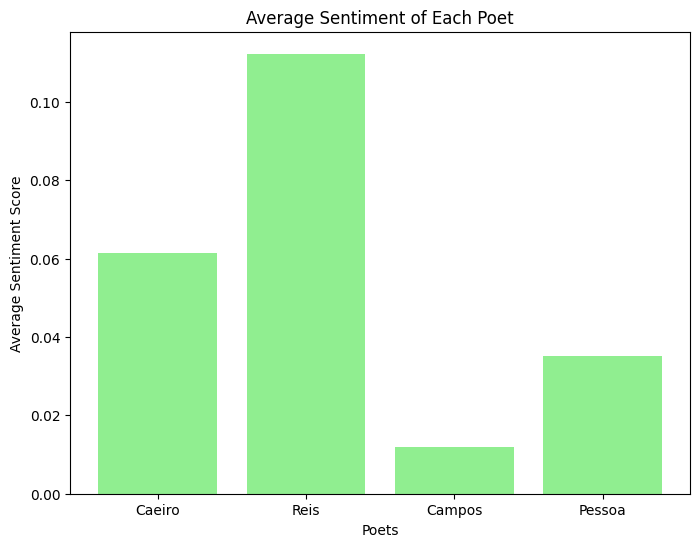

In [39]:
# Plot sentiment comparison
sentiments = [caeiro_sentiment, reis_sentiment, campos_sentiment, pessoa_sentiment]
poet_names = ['Caeiro', 'Reis', 'Campos', 'Pessoa']
plt.figure(figsize=(8, 6))
plt.bar(poet_names, sentiments, color='lightgreen')
plt.xlabel('Poets')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment of Each Poet')
plt.show()

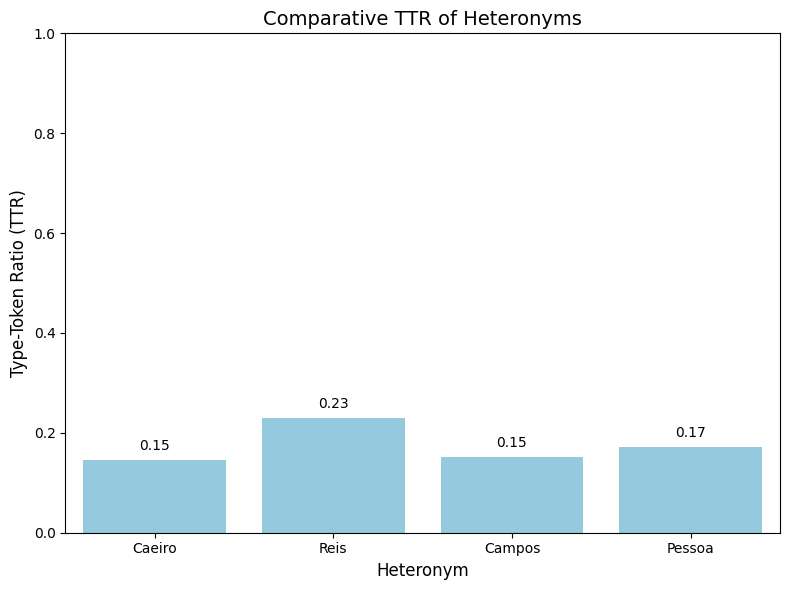

In [40]:
# Visualize the TTR for all heteronyms and Pessoa himself

heteronym_ttr = {
    'Caeiro': caeiro_ttr,
    'Reis': reis_ttr,
    'Campos': campos_ttr,
    'Pessoa': pessoa_ttr
}

# Convert the data to lists for plotting
heteronyms = list(heteronym_ttr.keys())
ttr_values = list(heteronym_ttr.values())

# Initiate the visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=heteronyms, y=ttr_values, color='skyblue')  # Changed palette to color

# Add labels and title
plt.xlabel('Heteronym', fontsize=12)
plt.ylabel('Type-Token Ratio (TTR)', fontsize=12)
plt.title('Comparative TTR of Heteronyms', fontsize=14)
plt.ylim(0, 1)  # TTR is between 0 and 1
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add the TTR values on top of the bars
for i, value in enumerate(ttr_values):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


## 2.7 Exporting to .txt and Saving the DataFrame to .csv

In [41]:
# Exports the corpus to .txt files.
pessoa_dict = GetDF("Pessoa", pessoa_formatted, pessoa_cleaned, pessoa_tokenized)[1]
ExportToTxt("Pessoa", pessoa_dict)

'Complete'

In [42]:
# A DF containing all four heteronyms' corpora.
all_df = pd.concat([caeiro_df, reis_df, campos_df, pessoa_df], axis=0)
all_df.to_csv("pessoa_heteronyms_full_corpus.csv")  # Exporting the DF to a .csv file.

# 3. Active Learning Exercises 

## 3.1 Sentiment Trend Visualization

In this section you can further reflect on the efficiency of NLTK's sentiment analysis tool. The code below accesses Pessoa and his heteronym's poems from the directory and displays a graph showing the sentiment trends throughout their works. 

In [43]:
def load_poems_from_folder(folder_path):
    poems = []
    for filename in os.listdir(folder_path):
        # Only load .txt files
        if filename.endswith(".txt"):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                poem = file.read().strip()  # Read the poem and remove extra spaces/newlines
                poems.append(poem)
    return poems

# Example loading poems for each heteronym from their respective folders
caeiro_poems = load_poems_from_folder("Caeiro")
reis_poems = load_poems_from_folder("Reis")
campos_poems = load_poems_from_folder("Campos")
pessoa_poems = load_poems_from_folder("Pessoa")

# Function to plot sentiment trend with poem display
def plot_sentiment_trend_with_poem_output(heteronym_formatted, heteronym_name, heteronym_poems):
    sentiments = [sentiment_analysis_heteronym([poem]) for poem in heteronym_poems]  # Get sentiment score for each poem
    plt.figure(figsize=(10, 5))
    
    # Plot sentiment trend
    plt.plot(range(len(sentiments)), sentiments, marker='o')
    plt.title(f"Sentiment Trend - {heteronym_name}")
    plt.xlabel("Poem Index")
    plt.ylabel("Sentiment Score")
    plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
    plt.show()

    # Display the sentiment and the poem for each index
    for i, (poem, sentiment_score) in enumerate(zip(heteronym_poems, sentiments)):
        print(f"Poem {i + 1}:")
        print(f"Sentiment Score: {sentiment_score:.3f}")
        print(poem)  # Display the poem text
        print("=" * 50)  # Separator between poems

Expand each cell to see the sentiment trend visualizations for each heteronym and Pessoa himself. The output also displays their integral poems which will aid in assesing the sentiment analysis function's efficiency. You can pick any point on the graph and scroll to its corresponding poem index for the assesment. 

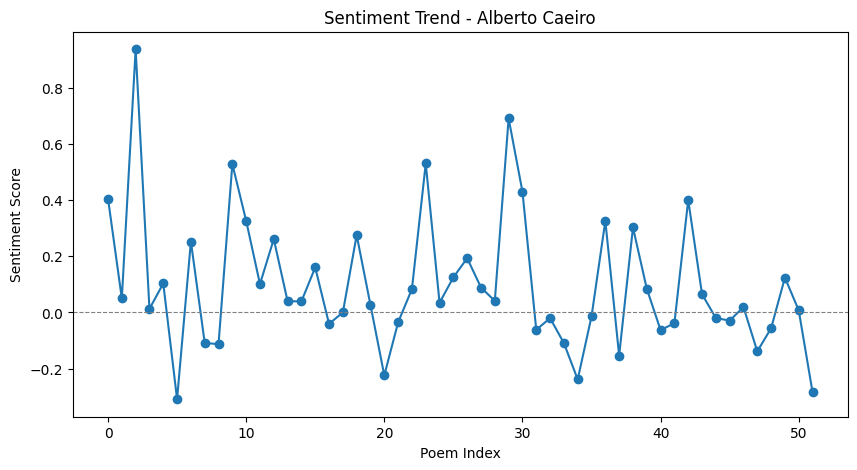

Poem 1:
Sentiment Score: 0.405
II My gaze is clear like a sunﬂower. It is my custom to walk the roads Looking right and left And sometimes looking behind me, And what I see at each moment Is what I never saw before, And I’m very good at noticing things. I’m capable of feeling the same wonder A newborn child would feel If he noticed that he’d really and truly been born. I feel at each moment that I’ve just been born Into a completely new world... I believe in the world as in a daisy, Because I see it. But I don’t think about it, Because to think is to not understand. The world wasn’t made for us to think about it (To think is to have eyes that aren’t well) But to look at it and to be in agreement. I have no philosophy, I have senses... If I speak of Nature it’s not because I know what it is But because I love it, and for that very reason, Because those who love never know what they love Or why they love, or what love is. To love is eternal innocence, And the only innocence is not to thi

In [44]:
# Plotting sentiment trends and displaying poems with sentiment scores
plot_sentiment_trend_with_poem_output(caeiro_formatted, "Alberto Caeiro", caeiro_poems)

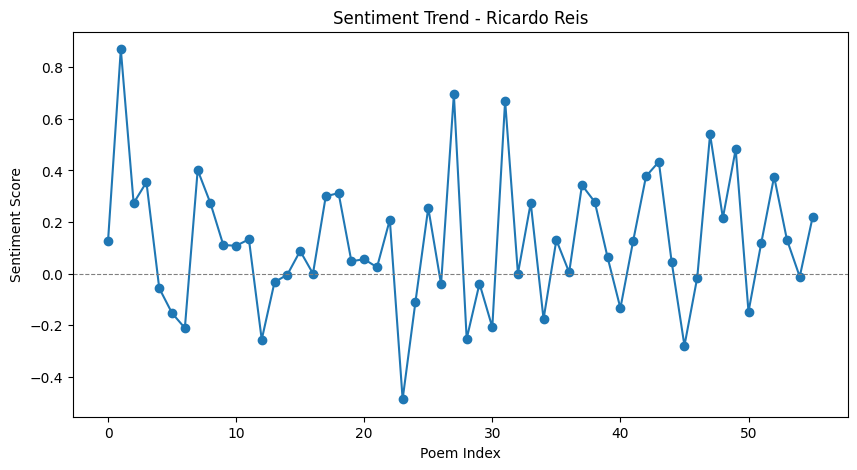

Poem 1:
Sentiment Score: 0.125
To Alberto Caeiro Peaceful, Master, Are all the hours We lose if we place, As in a vase, Flowers on our Losing them. There are in our life No sorrows or joys. So let us learn, Wisely unworried, Not how to live life But to let it go by, Keeping forever Peaceful and calm, Taking children For our teachers And letting Nature Fill our eyes... Along the river Or along the road, Wherever we are, Always remaining In the same, easy Repose of living... Time passes And tells us nothing. We grow old. Let us know how, With a certain mischief, To feel ourselves go. Taking action Serves no purpose. No one can resist The atrocious god Who always devours His own children. Let us pick ﬂowers. Let us lightly Wet our hands In the calm rivers, So as to learn Some of their calmness. Sunﬂowers forever Beholding the sun, We will serenely Depart from life, Without even the regret Of having lived.
Poem 2:
Sentiment Score: 0.870
The only freedom the gods grant us Is this: to submit

In [45]:
plot_sentiment_trend_with_poem_output(reis_formatted, "Ricardo Reis", reis_poems)

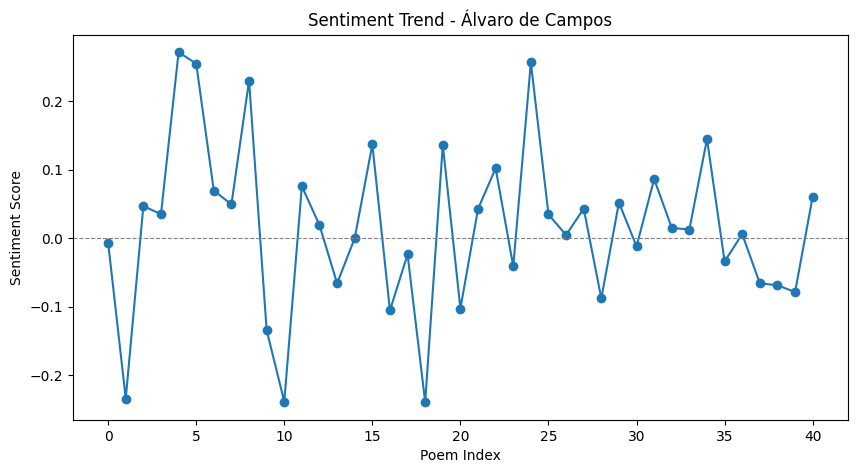

Poem 1:
Sentiment Score: -0.007
OPIARY It’s before I take opium that my soul is sick. To feel life is to wilt like a convalescent, And so I seek in opium’s consolation An East to the east of the East. This life on board is sure to kill me. Fever rages in my head day and night. And although I search until I’m ill, I can’t ﬁnd the spring to set me right. In paradox and astral incompetence, In golden folds I live my days, A wave in which dignity’s a descent And pleasures are ganglia of my malaise. It’s through a clockwork of disasters, A mechanism of pseudo-ﬂywheels, That I walk among visions of gallows In a garden of stemless, ﬂoating ﬂowers. I stagger through the handiwork Of an inner life of lace and lacquer. It’s as though at home I had the knife That beheaded St. John the Baptist. I’m atoning for a crime in a suitcase That my grandfather committed for fun. My nerves hang from the gibbet by the dozen, And I’ve fallen into the pit of opium. With the soporiﬁc nudge of morphine I lose my

In [46]:
plot_sentiment_trend_with_poem_output(campos_formatted, "Álvaro de Campos", campos_poems)

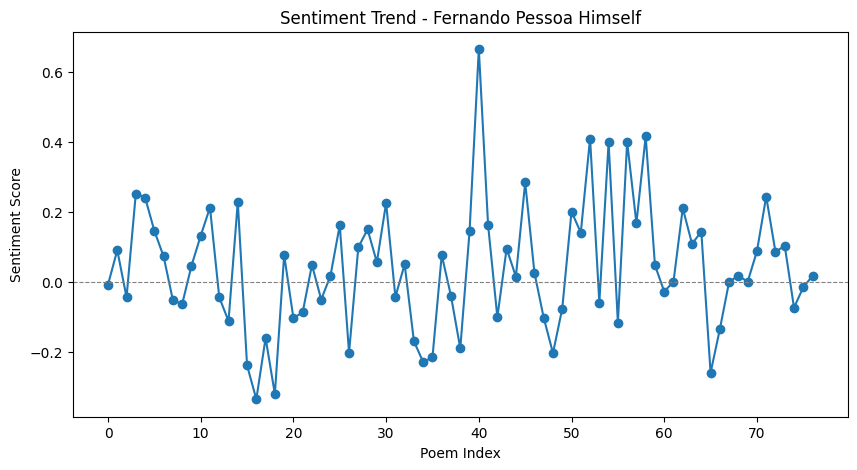

Poem 1:
Sentiment Score: -0.008
Swamps of yearnings brushing against my gilded soul... Distant tolling of Other Bells ...The blond wheat p aling In the ashen sunset ...My soul is seized by a bodily chill... How forever equal the Hour! ...The tops of the p alms swaying!... The leaves staring at the silence inside us ...Wi spy autumn Of a hazy bird’s singing . . . Stagnant, forgotten blue... How quiet the shout of yearning that gives this Hour claws! How my self-dread longs for something that doesn’t weep! My hands reach out to the beyond, but even as they’re reaching I see that what I desire is not what I want... Cymbals of Imperfection ...O distan tly ancient Hour Banished from its own Time-self! Receding wave that invades My ceaseless retreating into myself until I faint, So intent on the present I that I seem to forget myself!... Liquid of halos with no Was behind it, no Self inside it... The Mystery smacks of my being other ...Bur sting in the moonlight... The sentry stands very str

In [47]:
plot_sentiment_trend_with_poem_output(pessoa_formatted, "Fernando Pessoa Himself", pessoa_poems)

Write down in the cell below any interesting thoughts that arise upon the inspection of these graphs and their corresponding texts. Can you relate any of the findings to the biographies of the three heteronyms and Pessoa himself? Do you feel like the NLTK Sentiment Intesity Analyser yielded accurate results after reading some of the poems?

In [48]:
# Your thoughts here

## 3.2 Sensory Words Detection

Since you are now slightly familiar with Pessoa's heteronymous universe, the following exercises will help you explore it further using computational methods. Your task is to help design an experiment that will help you identify sensory words in Pessoa and each heteronym's corpus and reflect on how you could potentially relate these sensory words use to their biographies. For example, is Caeiro's rural lifestyle reflected through the use of sensory words pertaining to the rural landscape? Or, which heteronym reveals the most frequent use of the five senses (sight, smell, taste, touch and hearing) the most? Think about how you would design such experiments and fill in your code below. We will provide you with some guiding steps to start with!

First, you will need to define your list of sensory words. Later on you can change the lists and experiment with different variations.

In [49]:
# Define lists of sensory words
sight_words = []
smell_words = []
taste_words = []
touch_words = []
hearing_words = []

Next, define a function that will iterate through the lists of tokenized content words and will count all the sensory words from the lists that you chose earlier. Hint: the heteronym_tokenized variable used in some earlier functions is designed to contain all the tokenized content words for each heteronym and Pessoa himself. For e.g., Campos' tokenized content words are contained in the 'campos_tokenized' variable.

In [50]:
def count_sensory_words(heteronym_tokenized):
    # Initialize the counts for each sense
    sensory_counts = {
        'sight': 0,
        'smell': 0,
        'taste': 0,
        'touch': 0,
        'hearing': 0
    }

    # Iterate through the corpus and increase the count of each sense once a sensory related word of its category is found
    # Your code here

    return sensory_counts

If you encounter difficulties with finishing the function above open the code below to see the solution. Copy this code and paste it before your return statement. Make sure the identation is correct and remove the ''' in the beginning and the end.

In [ ]:


''' for poem in corpus:
        for word in poem:
            if word in sight_words:
                sensory_counts['sight'] += 1
            elif word in smell_words:
                sensory_counts['smell'] += 1
            elif word in taste_words:
                sensory_counts['taste'] += 1
            elif word in touch_words:
                sensory_counts['touch'] += 1
            elif word in hearing_words:
                sensory_counts['hearing'] += 1
                '''
''

Try your code on the corpus of Campos to see if it works as intended.

In [52]:
campos_sensory_word_counts = count_sensory_words(campos_tokenized)
print(campos_sensory_word_counts)

{'sight': 0, 'smell': 0, 'taste': 0, 'touch': 0, 'hearing': 0}


You can keep trying your code on the corpuses of the other heteronyms and Pessoa himself below, as well as come up with other methods. As you move on, reflect on the difficulty of designing such an experiment and what causes this difficulty. Is there any particular struggle in designing such an experiment when working with poems?

# 4. References

Pessoa, F., & Zenith, R. (2014). A little larger than the entire universe: Selected poems. Penguin Books.

Encyclopædia Britannica, inc. (2025, January 3). Horace. Encyclopædia Britannica. https://www.britannica.com/biography/Horace-Roman-poet

Poetry Foundation. (2025). Ode. Poetry Foundation. https://www.poetryfoundation.org/education/glossary/ode
